In [283]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [284]:
kospi1 = pd.read_csv("./연결찐.csv", encoding = "euc-kr")
kospi2 = pd.read_csv("./개별찐.csv", encoding = "euc-kr")

In [285]:
st13 = pd.read_csv("./코스피주식(2013).csv", encoding = "euc-kr")
st14 = pd.read_csv("./코스피주식(2014).csv", encoding = "euc-kr")
st15 = pd.read_csv("./코스피주식(2015).csv", encoding = "euc-kr")
st16 = pd.read_csv("./코스피주식(2016).csv", encoding = "euc-kr")
st17 = pd.read_csv("./코스피주식(2017).csv", encoding = "euc-kr")
st18 = pd.read_csv("./코스피주식(2018).csv", encoding = "euc-kr")
st19 = pd.read_csv("./코스피주식(2019).csv", encoding = "euc-kr")
st20 = pd.read_csv("./코스피주식(2020).csv", encoding = "euc-kr")
st21 = pd.read_csv("./코스피주식(2021).csv", encoding = "euc-kr")
st22 = pd.read_csv("./코스피주식(2022).csv", encoding = "euc-kr")

In [286]:
kospi1.columns = ["회사명", "종목코드", "회계년도", "종가", 'PER(최고)', 'PER(최저)', 'PBR(최고)', 'PBR(최저)', 'PCR(최고)', 'PCR(최저)', 'PSR(최고)', 'PSR(최저)', '이익수익률', 'ROE', '자산', '당기순이익', '판관비']
kospi2.columns = ["회사명", "종목코드", "회계년도", "종가", 'PER(최고)', 'PER(최저)', 'PBR(최고)', 'PBR(최저)', 'PCR(최고)', 'PCR(최저)', 'PSR(최고)', 'PSR(최저)', '이익수익률', 'ROE', '자산', '당기순이익', '판관비']

In [287]:
st13['회계년도'] = '2013/12'
st14['회계년도'] = '2014/12'
st15['회계년도'] = '2015/12'
st16['회계년도'] = '2016/12'
st17['회계년도'] = '2017/12'
st18['회계년도'] = '2018/12'
st19['회계년도'] = '2019/12'
st20['회계년도'] = '2020/12'
st21['회계년도'] = '2021/12'
st22['회계년도'] = '2022/12'


In [288]:
df = pd.concat([st13, st14, st15, st16, st17, st18, st19, st20, st21, st22], axis=0)

In [289]:
kospi = kospi1.fillna(kospi2)

In [290]:
kospi['종목코드'] = kospi['종목코드'].astype(str).str.zfill(6)

In [291]:
kospi['회사명'] = kospi['회사명'].str.replace('(주)', '')

In [292]:
kospi = pd.merge(kospi, df[['종목코드', '회계년도', '상장주식수', '시가총액']], on=['종목코드', '회계년도'], how='left')

In [293]:
kospi

,회사명,종목코드,회계년도,종가,PER(최고),PER(최저),PBR(최고),PBR(최저),PCR(최고),PCR(최저),PSR(최고),PSR(최저),이익수익률,ROE,자산,당기순이익,판관비,상장주식수,시가총액
0,BNK금융지주,138930,2013/12,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193379899.0,3.094078e+12
1,BNK금융지주,138930,2014/12,14500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234379899.0,3.398509e+12
2,BNK금융지주,138930,2015/12,8420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255935246.0,2.154975e+12
3,BNK금융지주,138930,2016/12,8680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325935246.0,2.829118e+12
4,BNK금융지주,138930,2017/12,9420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325935246.0,3.070310e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,효성티앤씨,298020,2018/12,185000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.138844e+09,3.149830e+07,130713422.0,4327682.0,8.006212e+11
1870,효성티앤씨,298020,2019/12,154500.0,423.44,295.52,2.36,1.64,6.03,4.21,0.22,0.16,6.57,20.86,3.224307e+09,1.220229e+08,240899527.0,4327682.0,6.686269e+11
1871,효성티앤씨,298020,2020/12,211000.0,15.27,5.21,2.05,0.70,4.83,1.65,0.30,0.10,9.64,25.10,2.824128e+09,1.682721e+08,231960469.0,4327682.0,9.131409e+11
1872,효성티앤씨,298020,2021/12,521000.0,15.10,3.23,7.86,1.68,20.38,4.36,0.91,0.20,6.67,76.22,4.526469e+09,1.007903e+09,275426084.0,4327682.0,2.254722e+12


In [294]:
# kospi['pbr'] = (kospi['종가']*kospi['상장주식수'])/(kospi['자산']-kospi['부채'])
# kospi['per'] = kospi['종가']/(kospi['당기순이익']/kospi['상장주식수'])
# kospi['pcr'] = kospi['종가']/(kospi['현금흐름']/kospi['상장주식수'])
# kospi['psr'] = kospi['종가']/(kospi['매출액']/kospi['상장주식수'])
# kospi['roe'] = kospi['당기순이익']/(kospi['자산']-kospi['부채'])
# kospi['roa'] = kospi['당기순이익']/kospi['자산']
# kospi['roic'] = kospi['당기순이익']/(kospi['자산']-kospi['비유동자산'])
# kospi['gpa'] = kospi['매출총이익']/kospi['자산']

In [295]:
# # 분자(EBIT)
# magic_ebit = kospi['당기순이익'] + kospi['법인세비용'] + kospi['이자비용']

# # 분모
# magic_cap = kospi['시가총액']
# magic_debt = kospi['부채']

# ## 분모: 여유자금
# magic_excess_cash = kospi['유동부채'] - kospi['유동자산'] + kospi[
#     '현금및현금성자산']
# magic_excess_cash[magic_excess_cash < 0] = 0
# magic_excess_cash_final = kospi['현금및현금성자산'] - magic_excess_cash

# magic_ev = magic_cap + magic_debt - magic_excess_cash_final

# # 이익수익률
# magic_ey = magic_ebit / magic_ev
# kospi['매직'] = magic_ey

In [296]:
kospi

,회사명,종목코드,회계년도,종가,PER(최고),PER(최저),PBR(최고),PBR(최저),PCR(최고),PCR(최저),PSR(최고),PSR(최저),이익수익률,ROE,자산,당기순이익,판관비,상장주식수,시가총액
0,BNK금융지주,138930,2013/12,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193379899.0,3.094078e+12
1,BNK금융지주,138930,2014/12,14500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234379899.0,3.398509e+12
2,BNK금융지주,138930,2015/12,8420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255935246.0,2.154975e+12
3,BNK금융지주,138930,2016/12,8680.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325935246.0,2.829118e+12
4,BNK금융지주,138930,2017/12,9420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,325935246.0,3.070310e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,효성티앤씨,298020,2018/12,185000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.138844e+09,3.149830e+07,130713422.0,4327682.0,8.006212e+11
1870,효성티앤씨,298020,2019/12,154500.0,423.44,295.52,2.36,1.64,6.03,4.21,0.22,0.16,6.57,20.86,3.224307e+09,1.220229e+08,240899527.0,4327682.0,6.686269e+11
1871,효성티앤씨,298020,2020/12,211000.0,15.27,5.21,2.05,0.70,4.83,1.65,0.30,0.10,9.64,25.10,2.824128e+09,1.682721e+08,231960469.0,4327682.0,9.131409e+11
1872,효성티앤씨,298020,2021/12,521000.0,15.10,3.23,7.86,1.68,20.38,4.36,0.91,0.20,6.67,76.22,4.526469e+09,1.007903e+09,275426084.0,4327682.0,2.254722e+12


In [297]:
# 컬럼 값의 뒤에서 "/12"를 제거하는 함수
def remove_suffix(value):
    if isinstance(value, str) and value.endswith("/12"):
        return value[:-3]  # 마지막 세 글자 제거
    else:
        return value

# 모든 컬럼에 함수 적용
kospi = kospi.applymap(remove_suffix)

In [298]:
kospi = kospi.dropna()

In [299]:
len(kospi['회사명'].unique())

179

In [300]:
kospi.isna().sum()

회사명        0
종목코드       0
회계년도       0
종가         0
PER(최고)    0
PER(최저)    0
PBR(최고)    0
PBR(최저)    0
PCR(최고)    0
PCR(최저)    0
PSR(최고)    0
PSR(최저)    0
이익수익률      0
ROE        0
자산         0
당기순이익      0
판관비        0
상장주식수      0
시가총액       0
dtype: int64

In [301]:
kospi['수익률'] = (kospi['종가'] / kospi['종가'].shift(1) - 1) * 100
kospi.loc[kospi['회계년도'] == "2013/12"]

,회사명,종목코드,회계년도,종가,PER(최고),PER(최저),PBR(최고),PBR(최저),PCR(최고),PCR(최저),PSR(최고),PSR(최저),이익수익률,ROE,자산,당기순이익,판관비,상장주식수,시가총액,수익률


In [302]:
kospi

,회사명,종목코드,회계년도,종가,PER(최고),PER(최저),PBR(최고),PBR(최저),PCR(최고),PCR(최저),PSR(최고),PSR(최저),이익수익률,ROE,자산,당기순이익,판관비,상장주식수,시가총액,수익률
10,DB하이텍,000990,2013,7530.0,0.00,0.00,3.25,1.79,14.01,7.73,0.81,0.45,12.36,-33.51,1.058392e+09,-8.304677e+07,98861923.0,44367832.0,3.340898e+11,NaN
11,DB하이텍,000990,2014,4615.0,0.00,0.00,5.25,2.02,8.22,3.17,0.69,0.26,6.50,-47.32,9.848766e+08,-7.700884e+07,91344601.0,44367832.0,2.047575e+11,-38.711819
12,DB하이텍,000990,2015,14300.0,6.74,1.47,3.53,0.77,5.71,1.25,1.29,0.28,5.11,67.63,9.846437e+08,1.267334e+08,104710656.0,44367832.0,6.344600e+11,209.859155
13,DB하이텍,000990,2016,15900.0,10.60,5.92,2.75,1.54,3.78,2.11,1.21,0.67,4.06,29.65,9.867886e+08,8.834402e+07,117582311.0,44367832.0,7.054485e+11,11.188811
14,DB하이텍,000990,2017,12000.0,14.03,6.76,2.58,1.24,5.73,2.76,1.54,0.74,3.71,27.62,9.939507e+08,1.101751e+08,110371984.0,44367832.0,5.324140e+11,-24.528302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,효성첨단소재,298050,2022,333500.0,12.65,6.40,4.08,2.06,11.79,5.96,3.13,1.58,14.35,19.11,2.934713e+09,1.602384e+08,206941913.0,4479948.0,1.494063e+12,-44.043624
1870,효성티앤씨,298020,2019,154500.0,423.44,295.52,2.36,1.64,6.03,4.21,0.22,0.16,6.57,20.86,3.224307e+09,1.220229e+08,240899527.0,4327682.0,6.686269e+11,-53.673163
1871,효성티앤씨,298020,2020,211000.0,15.27,5.21,2.05,0.70,4.83,1.65,0.30,0.10,9.64,25.10,2.824128e+09,1.682721e+08,231960469.0,4327682.0,9.131409e+11,36.569579
1872,효성티앤씨,298020,2021,521000.0,15.10,3.23,7.86,1.68,20.38,4.36,0.91,0.20,6.67,76.22,4.526469e+09,1.007903e+09,275426084.0,4327682.0,2.254722e+12,146.919431


In [303]:
kospi["PER"] = (kospi["PER(최고)"] + kospi["PER(최저)"])/2
kospi["PBR"] = (kospi["PBR(최고)"] + kospi["PBR(최저)"])/2
kospi["PCR"] = (kospi["PCR(최고)"] + kospi["PCR(최저)"])/2
kospi["PSR"] = (kospi["PSR(최고)"] + kospi["PSR(최저)"])/2
kospi.drop(["PER(최고)", "PER(최저)", "PBR(최고)", "PBR(최저)", "PCR(최고)", "PCR(최저)", "PSR(최고)", "PSR(최저)"], axis=1, inplace=True)

In [304]:
kospi

,회사명,종목코드,회계년도,종가,이익수익률,ROE,자산,당기순이익,판관비,상장주식수,시가총액,수익률,PER,PBR,PCR,PSR
10,DB하이텍,000990,2013,7530.0,12.36,-33.51,1.058392e+09,-8.304677e+07,98861923.0,44367832.0,3.340898e+11,NaN,0.000,2.520,10.870,0.630
11,DB하이텍,000990,2014,4615.0,6.50,-47.32,9.848766e+08,-7.700884e+07,91344601.0,44367832.0,2.047575e+11,-38.711819,0.000,3.635,5.695,0.475
12,DB하이텍,000990,2015,14300.0,5.11,67.63,9.846437e+08,1.267334e+08,104710656.0,44367832.0,6.344600e+11,209.859155,4.105,2.150,3.480,0.785
13,DB하이텍,000990,2016,15900.0,4.06,29.65,9.867886e+08,8.834402e+07,117582311.0,44367832.0,7.054485e+11,11.188811,8.260,2.145,2.945,0.940
14,DB하이텍,000990,2017,12000.0,3.71,27.62,9.939507e+08,1.101751e+08,110371984.0,44367832.0,5.324140e+11,-24.528302,10.395,1.910,4.245,1.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,효성첨단소재,298050,2022,333500.0,14.35,19.11,2.934713e+09,1.602384e+08,206941913.0,4479948.0,1.494063e+12,-44.043624,9.525,3.070,8.875,2.355
1870,효성티앤씨,298020,2019,154500.0,6.57,20.86,3.224307e+09,1.220229e+08,240899527.0,4327682.0,6.686269e+11,-53.673163,359.480,2.000,5.120,0.190
1871,효성티앤씨,298020,2020,211000.0,9.64,25.10,2.824128e+09,1.682721e+08,231960469.0,4327682.0,9.131409e+11,36.569579,10.240,1.375,3.240,0.200
1872,효성티앤씨,298020,2021,521000.0,6.67,76.22,4.526469e+09,1.007903e+09,275426084.0,4327682.0,2.254722e+12,146.919431,9.165,4.770,12.370,0.555


In [305]:
kospi["ROA"] = kospi["당기순이익"]/kospi["자산"]*100
kospi["NEW"] = kospi["판관비"]/kospi["시가총액"]*1000
kospi

,회사명,종목코드,회계년도,종가,이익수익률,ROE,자산,당기순이익,판관비,상장주식수,시가총액,수익률,PER,PBR,PCR,PSR,ROA,NEW
10,DB하이텍,000990,2013,7530.0,12.36,-33.51,1.058392e+09,-8.304677e+07,98861923.0,44367832.0,3.340898e+11,NaN,0.000,2.520,10.870,0.630,-7.846505,0.295914
11,DB하이텍,000990,2014,4615.0,6.50,-47.32,9.848766e+08,-7.700884e+07,91344601.0,44367832.0,2.047575e+11,-38.711819,0.000,3.635,5.695,0.475,-7.819136,0.446111
12,DB하이텍,000990,2015,14300.0,5.11,67.63,9.846437e+08,1.267334e+08,104710656.0,44367832.0,6.344600e+11,209.859155,4.105,2.150,3.480,0.785,12.870986,0.165039
13,DB하이텍,000990,2016,15900.0,4.06,29.65,9.867886e+08,8.834402e+07,117582311.0,44367832.0,7.054485e+11,11.188811,8.260,2.145,2.945,0.940,8.952679,0.166677
14,DB하이텍,000990,2017,12000.0,3.71,27.62,9.939507e+08,1.101751e+08,110371984.0,44367832.0,5.324140e+11,-24.528302,10.395,1.910,4.245,1.140,11.084563,0.207305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,효성첨단소재,298050,2022,333500.0,14.35,19.11,2.934713e+09,1.602384e+08,206941913.0,4479948.0,1.494063e+12,-44.043624,9.525,3.070,8.875,2.355,5.460103,0.138510
1870,효성티앤씨,298020,2019,154500.0,6.57,20.86,3.224307e+09,1.220229e+08,240899527.0,4327682.0,6.686269e+11,-53.673163,359.480,2.000,5.120,0.190,3.784469,0.360290
1871,효성티앤씨,298020,2020,211000.0,9.64,25.10,2.824128e+09,1.682721e+08,231960469.0,4327682.0,9.131409e+11,36.569579,10.240,1.375,3.240,0.200,5.958373,0.254025
1872,효성티앤씨,298020,2021,521000.0,6.67,76.22,4.526469e+09,1.007903e+09,275426084.0,4327682.0,2.254722e+12,146.919431,9.165,4.770,12.370,0.555,22.266860,0.122155


In [306]:
kospi["EY"] = 1/kospi["이익수익률"]
kospi

,회사명,종목코드,회계년도,종가,이익수익률,ROE,자산,당기순이익,판관비,상장주식수,시가총액,수익률,PER,PBR,PCR,PSR,ROA,NEW,EY
10,DB하이텍,000990,2013,7530.0,12.36,-33.51,1.058392e+09,-8.304677e+07,98861923.0,44367832.0,3.340898e+11,NaN,0.000,2.520,10.870,0.630,-7.846505,0.295914,0.080906
11,DB하이텍,000990,2014,4615.0,6.50,-47.32,9.848766e+08,-7.700884e+07,91344601.0,44367832.0,2.047575e+11,-38.711819,0.000,3.635,5.695,0.475,-7.819136,0.446111,0.153846
12,DB하이텍,000990,2015,14300.0,5.11,67.63,9.846437e+08,1.267334e+08,104710656.0,44367832.0,6.344600e+11,209.859155,4.105,2.150,3.480,0.785,12.870986,0.165039,0.195695
13,DB하이텍,000990,2016,15900.0,4.06,29.65,9.867886e+08,8.834402e+07,117582311.0,44367832.0,7.054485e+11,11.188811,8.260,2.145,2.945,0.940,8.952679,0.166677,0.246305
14,DB하이텍,000990,2017,12000.0,3.71,27.62,9.939507e+08,1.101751e+08,110371984.0,44367832.0,5.324140e+11,-24.528302,10.395,1.910,4.245,1.140,11.084563,0.207305,0.269542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,효성첨단소재,298050,2022,333500.0,14.35,19.11,2.934713e+09,1.602384e+08,206941913.0,4479948.0,1.494063e+12,-44.043624,9.525,3.070,8.875,2.355,5.460103,0.138510,0.069686
1870,효성티앤씨,298020,2019,154500.0,6.57,20.86,3.224307e+09,1.220229e+08,240899527.0,4327682.0,6.686269e+11,-53.673163,359.480,2.000,5.120,0.190,3.784469,0.360290,0.152207
1871,효성티앤씨,298020,2020,211000.0,9.64,25.10,2.824128e+09,1.682721e+08,231960469.0,4327682.0,9.131409e+11,36.569579,10.240,1.375,3.240,0.200,5.958373,0.254025,0.103734
1872,효성티앤씨,298020,2021,521000.0,6.67,76.22,4.526469e+09,1.007903e+09,275426084.0,4327682.0,2.254722e+12,146.919431,9.165,4.770,12.370,0.555,22.266860,0.122155,0.149925


In [307]:
# kospi.to_csv('./kospi(0530).csv', index=False)

In [308]:
# kospi.loc[kospi["회계년도"] == "2013/12"].sort_values(by = ["PER"], ascending=False)

In [309]:
# pbr_jan2013 = kospi.loc[kospi["회계년도"] == "2013/12"][kospi["거래월"] == 1.0].sort_values(by = ["pbr"], ascending=False)

In [310]:
kospi['회계년도'] = kospi['회계년도'].astype(int)

In [311]:
adjust_price = pd.read_csv("./adjust_price.csv")

In [312]:

# 날짜를 년도로 변환
adjust_price['날짜'] = pd.to_datetime(adjust_price['날짜'])
adjust_price['년도'] = adjust_price['날짜'].dt.year
adjust_price = adjust_price[['년도', '종목', '종가', '수익률']]
adjust_price

,년도,종목,종가,수익률
0,2013,DB하이텍,6440.0,NaN
1,2014,DB하이텍,6640.0,0.310559
2,2015,DB하이텍,5880.0,-1.144578
3,2016,DB하이텍,18100.0,20.782313
4,2017,DB하이텍,20350.0,1.243094
...,...,...,...,...
1543,2022,효성첨단소재,522000.0,4.051144
1544,2019,효성티앤씨,179000.0,NaN
1545,2020,효성티앤씨,104000.0,-4.189944
1546,2021,효성티앤씨,558000.0,43.653846


In [313]:
merged_df = pd.merge(kospi, adjust_price[['년도', '종목', '종가']], left_on=['회계년도', '회사명'], right_on=['년도', '종목'], how='left')
merged_df.drop(['년도', '종목'], axis=1, inplace=True)
merged_df

,회사명,종목코드,회계년도,종가_x,이익수익률,ROE,자산,당기순이익,판관비,상장주식수,시가총액,수익률,PER,PBR,PCR,PSR,ROA,NEW,EY,종가_y
0,DB하이텍,000990,2013,7530.0,12.36,-33.51,1.058392e+09,-8.304677e+07,98861923.0,44367832.0,3.340898e+11,NaN,0.000,2.520,10.870,0.630,-7.846505,0.295914,0.080906,6440.0
1,DB하이텍,000990,2014,4615.0,6.50,-47.32,9.848766e+08,-7.700884e+07,91344601.0,44367832.0,2.047575e+11,-38.711819,0.000,3.635,5.695,0.475,-7.819136,0.446111,0.153846,6640.0
2,DB하이텍,000990,2015,14300.0,5.11,67.63,9.846437e+08,1.267334e+08,104710656.0,44367832.0,6.344600e+11,209.859155,4.105,2.150,3.480,0.785,12.870986,0.165039,0.195695,5880.0
3,DB하이텍,000990,2016,15900.0,4.06,29.65,9.867886e+08,8.834402e+07,117582311.0,44367832.0,7.054485e+11,11.188811,8.260,2.145,2.945,0.940,8.952679,0.166677,0.246305,18100.0
4,DB하이텍,000990,2017,12000.0,3.71,27.62,9.939507e+08,1.101751e+08,110371984.0,44367832.0,5.324140e+11,-24.528302,10.395,1.910,4.245,1.140,11.084563,0.207305,0.269542,20350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,효성첨단소재,298050,2022,333500.0,14.35,19.11,2.934713e+09,1.602384e+08,206941913.0,4479948.0,1.494063e+12,-44.043624,9.525,3.070,8.875,2.355,5.460103,0.138510,0.069686,522000.0
1535,효성티앤씨,298020,2019,154500.0,6.57,20.86,3.224307e+09,1.220229e+08,240899527.0,4327682.0,6.686269e+11,-53.673163,359.480,2.000,5.120,0.190,3.784469,0.360290,0.152207,179000.0
1536,효성티앤씨,298020,2020,211000.0,9.64,25.10,2.824128e+09,1.682721e+08,231960469.0,4327682.0,9.131409e+11,36.569579,10.240,1.375,3.240,0.200,5.958373,0.254025,0.103734,104000.0
1537,효성티앤씨,298020,2021,521000.0,6.67,76.22,4.526469e+09,1.007903e+09,275426084.0,4327682.0,2.254722e+12,146.919431,9.165,4.770,12.370,0.555,22.266860,0.122155,0.149925,558000.0


In [314]:
merged_df.columns = ['회사명', '종목코드', '회계년도', '종가', '이익수익률', 'ROE', '자산', '당기순이익', '판관비',
       '상장주식수', '시가총액', '수익률', 'PER', 'PBR', 'PCR', 'PSR', 'ROA', 'NEW', 'EY',
       '수정종가']

In [315]:
merged_df

,회사명,종목코드,회계년도,종가,이익수익률,ROE,자산,당기순이익,판관비,상장주식수,시가총액,수익률,PER,PBR,PCR,PSR,ROA,NEW,EY,수정종가
0,DB하이텍,000990,2013,7530.0,12.36,-33.51,1.058392e+09,-8.304677e+07,98861923.0,44367832.0,3.340898e+11,NaN,0.000,2.520,10.870,0.630,-7.846505,0.295914,0.080906,6440.0
1,DB하이텍,000990,2014,4615.0,6.50,-47.32,9.848766e+08,-7.700884e+07,91344601.0,44367832.0,2.047575e+11,-38.711819,0.000,3.635,5.695,0.475,-7.819136,0.446111,0.153846,6640.0
2,DB하이텍,000990,2015,14300.0,5.11,67.63,9.846437e+08,1.267334e+08,104710656.0,44367832.0,6.344600e+11,209.859155,4.105,2.150,3.480,0.785,12.870986,0.165039,0.195695,5880.0
3,DB하이텍,000990,2016,15900.0,4.06,29.65,9.867886e+08,8.834402e+07,117582311.0,44367832.0,7.054485e+11,11.188811,8.260,2.145,2.945,0.940,8.952679,0.166677,0.246305,18100.0
4,DB하이텍,000990,2017,12000.0,3.71,27.62,9.939507e+08,1.101751e+08,110371984.0,44367832.0,5.324140e+11,-24.528302,10.395,1.910,4.245,1.140,11.084563,0.207305,0.269542,20350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,효성첨단소재,298050,2022,333500.0,14.35,19.11,2.934713e+09,1.602384e+08,206941913.0,4479948.0,1.494063e+12,-44.043624,9.525,3.070,8.875,2.355,5.460103,0.138510,0.069686,522000.0
1535,효성티앤씨,298020,2019,154500.0,6.57,20.86,3.224307e+09,1.220229e+08,240899527.0,4327682.0,6.686269e+11,-53.673163,359.480,2.000,5.120,0.190,3.784469,0.360290,0.152207,179000.0
1536,효성티앤씨,298020,2020,211000.0,9.64,25.10,2.824128e+09,1.682721e+08,231960469.0,4327682.0,9.131409e+11,36.569579,10.240,1.375,3.240,0.200,5.958373,0.254025,0.103734,104000.0
1537,효성티앤씨,298020,2021,521000.0,6.67,76.22,4.526469e+09,1.007903e+09,275426084.0,4327682.0,2.254722e+12,146.919431,9.165,4.770,12.370,0.555,22.266860,0.122155,0.149925,558000.0


In [316]:
merged_df.drop(["이익수익률", "자산", "판관비", "당기순이익"], axis=1, inplace=True)

In [317]:
merged_df['수익률'] = merged_df.groupby('회사명')['수정종가'].pct_change() * 10

In [318]:
merged_df = merged_df.dropna()

In [319]:
merged_df.to_csv('./kospi(최종).csv', index=False)

In [320]:
kospi = pd.read_csv("./kospi(최종).csv")

In [321]:
kospi = kospi.replace([np.inf, -np.inf], 0)

In [322]:
kospi.columns

Index(['회사명', '종목코드', '회계년도', '종가', 'ROE', '상장주식수', '시가총액', '수익률', 'PER',
       'PBR', 'PCR', 'PSR', 'ROA', 'NEW', 'EY', '수정종가'],
      dtype='object')

In [323]:
kospi_col = kospi[['ROE','PER', 'PBR', 'PCR', 'PSR', 'ROA', 'NEW', 'EY']]

In [324]:
kospi_col_list = kospi_col.columns

In [325]:
kospi_col

,ROE,PER,PBR,PCR,PSR,ROA,NEW,EY
0,-47.32,0.000,3.635,5.695,0.475,-7.819136,0.446111,0.153846
1,67.63,4.105,2.150,3.480,0.785,12.870986,0.165039,0.195695
2,29.65,8.260,2.145,2.945,0.940,8.952679,0.166677,0.246305
3,27.62,10.395,1.910,4.245,1.140,11.084563,0.207305,0.269542
4,17.12,7.210,1.360,3.755,1.025,8.141211,0.212452,0.268097
...,...,...,...,...,...,...,...,...
1334,41.51,15.085,4.550,16.070,2.385,11.346144,0.074404,0.034554
1335,19.11,9.525,3.070,8.875,2.355,5.460103,0.138510,0.069686
1336,25.10,10.240,1.375,3.240,0.200,5.958373,0.254025,0.103734
1337,76.22,9.165,4.770,12.370,0.555,22.266860,0.122155,0.149925


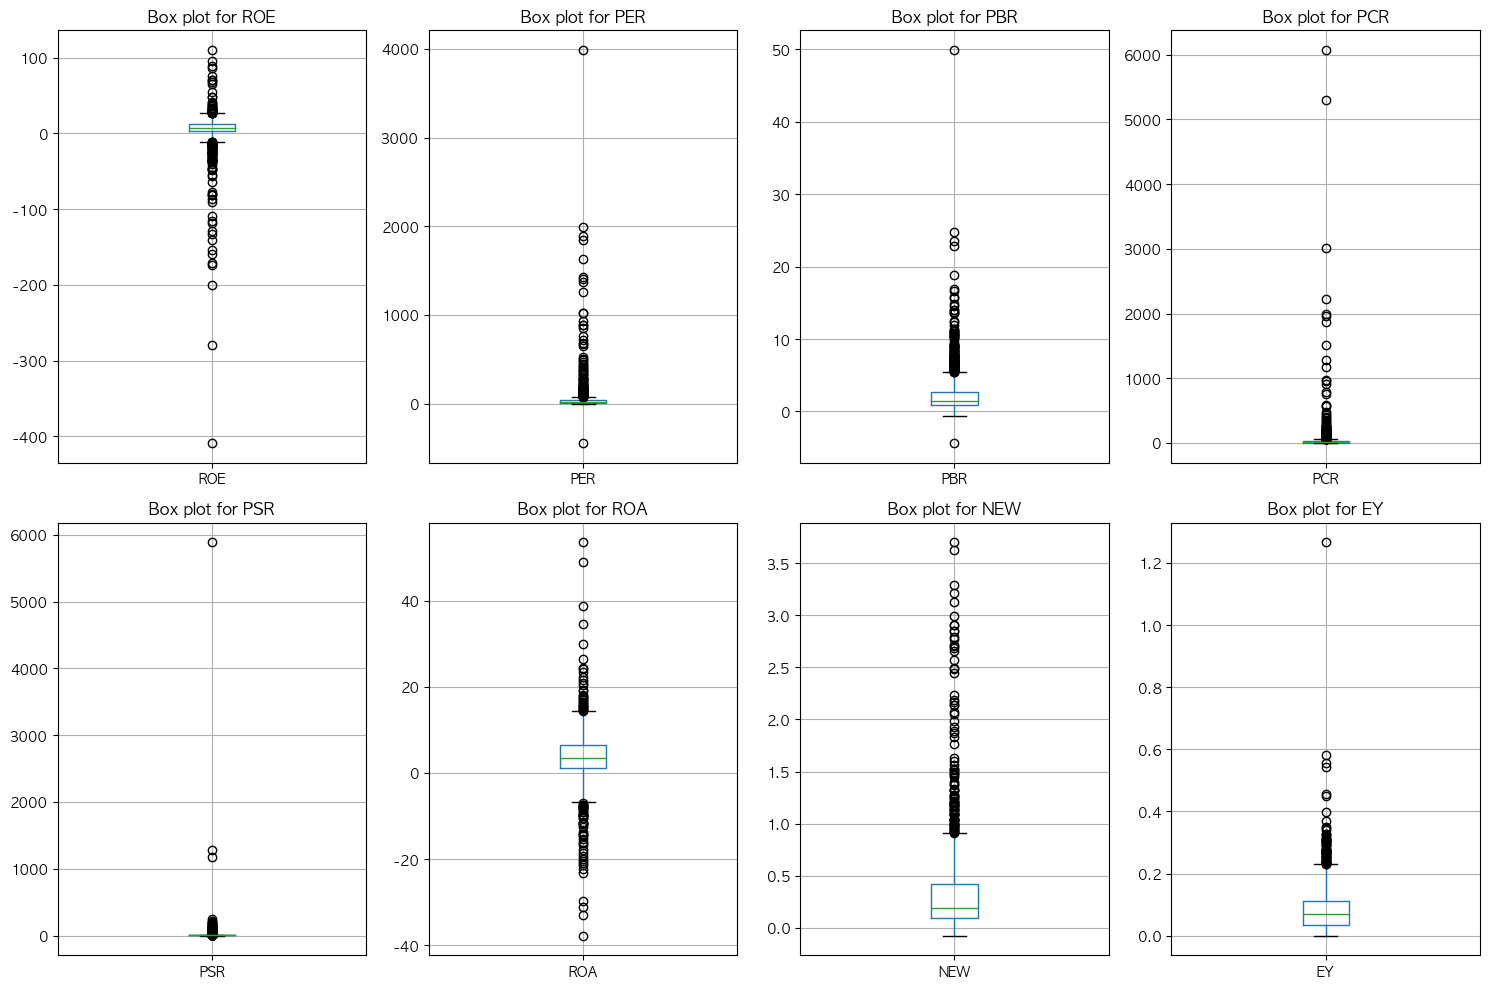

In [326]:
# 박스플롯
n = len(kospi_col_list)
ncols = 4
nrows = n // ncols + (n % ncols > 0)

# 서브플롯 생성
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows*5))

for i, var in enumerate(kospi_col_list):
    r, c = i // ncols, i % ncols
    ax = axes[r, c]
    kospi_col.boxplot(column=var, ax=ax)
    ax.set_title(f'Box plot for {var}')

# 빈 서브플롯 제거
if n % ncols > 0:
    for j in range(n % ncols, ncols):
        fig.delaxes(axes[nrows-1, j])

plt.tight_layout()
plt.show()

In [333]:
kospi[['회사명', '종목코드', '회계년도', '종가', '상장주식수', '시가총액', '수익률', '수정종가']]

,회사명,종목코드,회계년도,종가,상장주식수,시가총액,수익률,수정종가
0,DB하이텍,990,2014,4615.0,44367832.0,2.047575e+11,0.310559,6640.0
1,DB하이텍,990,2015,14300.0,44367832.0,6.344600e+11,-1.144578,5880.0
2,DB하이텍,990,2016,15900.0,44367832.0,7.054485e+11,20.782313,18100.0
3,DB하이텍,990,2017,12000.0,44367832.0,5.324140e+11,1.243094,20350.0
4,DB하이텍,990,2018,10850.0,44398588.0,4.817247e+11,-3.046683,14150.0
...,...,...,...,...,...,...,...,...
1334,효성첨단소재,298050,2021,596000.0,4479948.0,2.670049e+12,51.001642,371500.0
1335,효성첨단소재,298050,2022,333500.0,4479948.0,1.494063e+12,4.051144,522000.0
1336,효성티앤씨,298020,2020,211000.0,4327682.0,9.131409e+11,-4.189944,104000.0
1337,효성티앤씨,298020,2021,521000.0,4327682.0,2.254722e+12,43.653846,558000.0


In [328]:
import numpy as np
from sklearn.preprocessing import StandardScaler
# 데이터 불균형이 심해서 정규성이 있다고 가정하고
# standard 스케일링
scaler = StandardScaler()
kospi[kospi_col_list] = scaler.fit_transform(kospi[kospi_col_list])

print(kospi.head())

     회사명  종목코드  회계년도       종가       ROE       상장주식수          시가총액        수익률   
0  DB하이텍   990  2014   4615.0 -2.170344  44367832.0  2.047575e+11   0.310559  \
1  DB하이텍   990  2015  14300.0  2.577178  44367832.0  6.344600e+11  -1.144578   
2  DB하이텍   990  2016  15900.0  1.008576  44367832.0  7.054485e+11  20.782313   
3  DB하이텍   990  2017  12000.0  0.924735  44367832.0  5.324140e+11   1.243094   
4  DB하이텍   990  2018  10850.0  0.491077  44398588.0  4.817247e+11  -3.046683   

        PER       PBR       PCR       PSR       ROA       NEW        EY   
0 -0.279664  0.410406 -0.157249 -0.070908 -1.857339  0.210623  0.884955  \
1 -0.257790 -0.097396 -0.165312 -0.069069  1.499697 -0.396059  1.421180   
2 -0.235650 -0.099105 -0.167259 -0.068149  0.863940 -0.392522  2.069677   
3 -0.224274 -0.179465 -0.162527 -0.066963  1.209844 -0.304830  2.367415   
4 -0.241245 -0.367539 -0.164311 -0.067645  0.732276 -0.293720  2.348896   

      수정종가  
0   6640.0  
1   5880.0  
2  18100.0  
3  20350.0  
4  

In [329]:
kospi_col_list

Index(['ROE', 'PER', 'PBR', 'PCR', 'PSR', 'ROA', 'NEW', 'EY'], dtype='object')